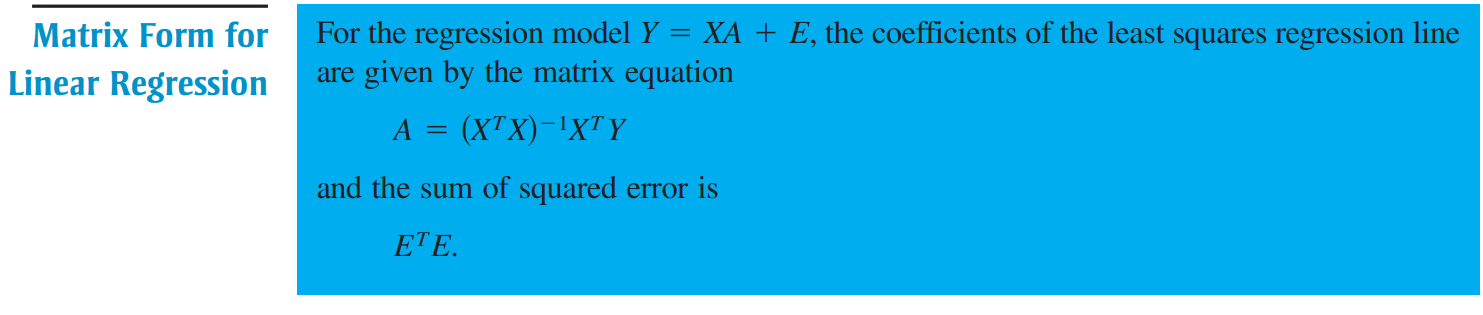

In [68]:
import numpy as np

In [69]:
class LSRA:
    def __init__(self):
        self.bias_ = 0.0
        self.slope_ = 0.0
        self.error_ = 0.0
        
    def transform(self, X):
        return np.array([[1, x] for x in X])
    
    def fit(self, X, y):
        X_transform = self.transform(X)
        X_transpose = np.transpose(X_transform)
        XtX = np.dot(X_transpose, X_transform)
        XtX_inverse = np.linalg.inv(XtX)
        XtY = np.dot(X_transpose, y)
    
        self.bias_, self.slope_ = np.dot(XtX_inverse, XtY)
        self.bias_ = np.round(self.bias_, 3)
        self.slope_ = np.round(self.slope_, 3)
        
        self.score(X, y)
    
    def score(self, X, y_true):
        y_pred = self.predict(X)
        error = 0.0
        
        for i in range(len(X)):
            error += (y[i] - y_pred[i])**2
        
        error =  (error / len(y_true))**(1/2.0)
        self.error_ = np.round(error, 3)
        
    def predict(self, X):
        y_pred = np.array([], 'float')
        for x in X:
            y_pred = np.append(y_pred, self.bias_ + self.slope_ * x)
    
        return y_pred

In [70]:
import matplotlib.pyplot as plt
def setModelAndPlot(X, y):
    lsra = LSRA()
    lsra.fit(X, y)
    print(f"""
    Bias = {lsra.bias_}
    SLope = {lsra.slope_}
    Error = {lsra.error_}
    """)
    y_pred = lsra.predict(X)
    
    plt.scatter(X, y, color='red', label='Data Points')
    plt.plot(X, y_pred, color = 'green', label = 'Least Square Regression Line')

    plt.title("Method of Least Squares Regression")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()


    Bias = -0.2
    SLope = 1.2
    Error = 0.4
    


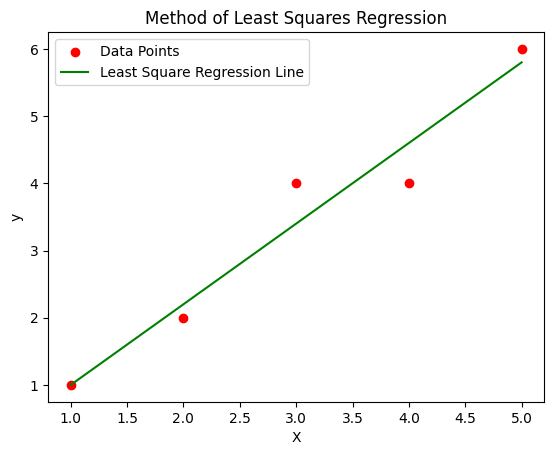

In [71]:
X = [1, 2, 3, 4, 5]
y = [1, 2, 4, 4, 6]

setModelAndPlot(X, y)


    Bias = 1.333
    SLope = 0.75
    Error = 0.236
    


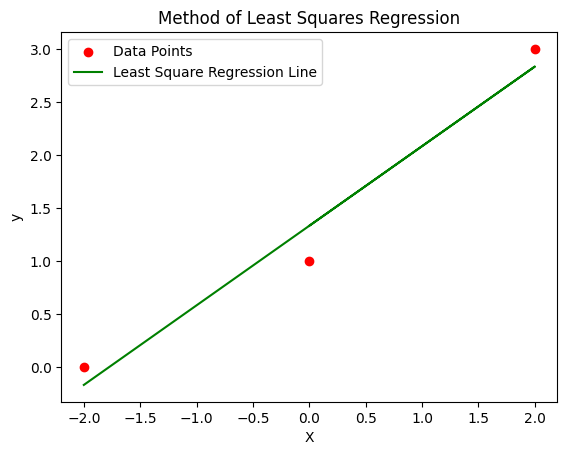

In [72]:
X = [0, 2, -2]
y = [1, 3, 0]
setModelAndPlot(X, y)


    Bias = 1.0
    SLope = 0.3
    Error = 0.224
    


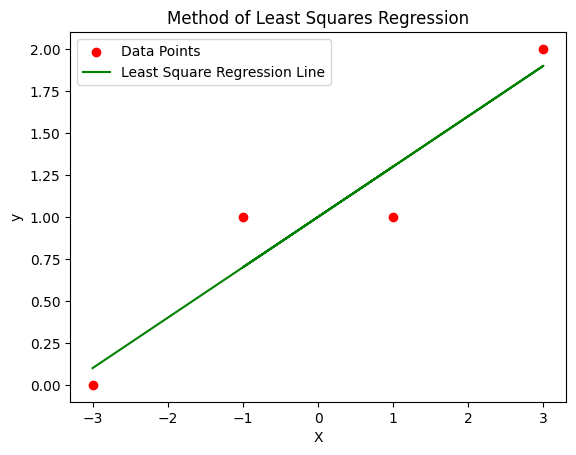

In [73]:
X = [1, -1, 3, -3]
y = [1, 1, 2, 0]
setModelAndPlot(X, y)


    Bias = -0.75
    SLope = 0.5
    Error = 0.433
    


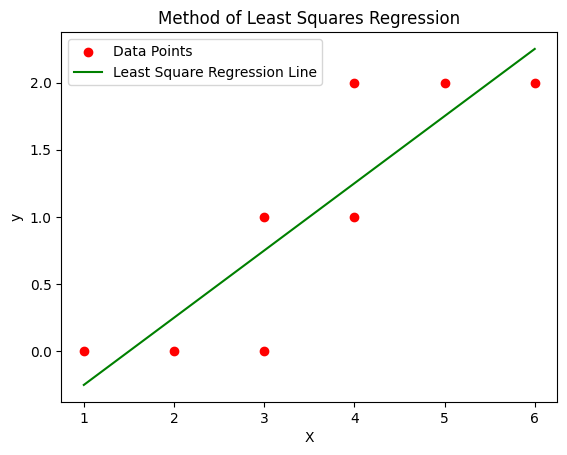

In [74]:
X = [1, 2, 3, 3, 4, 4, 5, 6]
y = [0, 0, 1, 0, 2, 1, 2, 2]
setModelAndPlot(X, y)